# Regression Modeling (Logistic Regression)

**The purpose** of this notebook is to perform EDA and a regression model.

**The goal** is to build a logistic regression model and evaluate the model.

---

*This activity has five parts:*

**Part 1:** Imports and Load Data

**Part 2:** EDA & Checking Model Assumptions

**Part 3:** Build Model and Evaluation

**Part 4:** Interpret Model Results

**Part 5:** Conclusion

## Part 1: Imports and Load Data

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
sns.set_theme()
sns.set_palette('colorblind')

In [3]:
# Load dataset into dataframe
data = pd.read_csv('data/tiktok_dataset.csv')

## Part 2: EDA & Checking Model Assumptions

### Basic Data Info

In [4]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# Get number of rows and columns
data.shape

(19382, 12)

In [6]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [7]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [8]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### Missing Values and Duplicates

In [9]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Drop rows with missing values
data = data.dropna()

# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
# Check for number of duplicates
data.duplicated().sum()

0

### Outliers

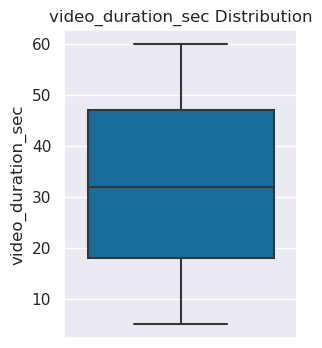

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(data=data, y='video_duration_sec', ax=ax)
ax.set_title('video_duration_sec Distribution')

plt.show()

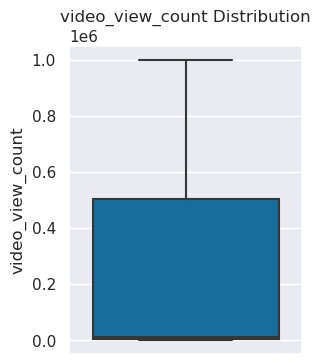

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(data=data, y='video_view_count', ax=ax)
ax.set_title('video_view_count Distribution')

plt.show()

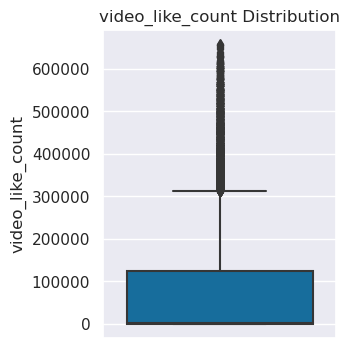

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(data=data, y='video_like_count', ax=ax)
ax.set_title('video_like_count Distribution')

plt.show()

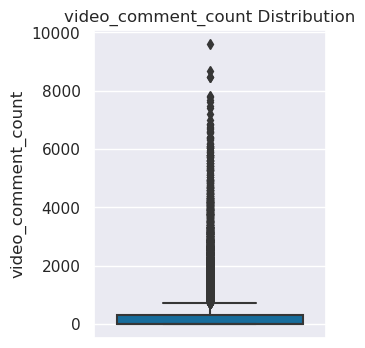

In [15]:
# Create a boxplot to visualize distribution of `video_comment_count`
fig, ax = plt.subplots(figsize=(3,4))
sns.boxplot(data=data, y='video_comment_count', ax=ax)
ax.set_title('video_comment_count Distribution')

plt.show()

From the boxplots, we can see that there are outliers in `video_like_count` and `video_comment_count` that went over the upper fence/limit.

In [16]:
# Handle outliers for `video_like_count`
q1 = data['video_like_count'].quantile(0.25)
q3 = data['video_like_count'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

# Change outlier values to match the upper limit 
data.loc[data['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

In [17]:
# Handle outliers for `video_comment_count`
q1 = data['video_comment_count'].quantile(0.25)
q3 = data['video_comment_count'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

# Change outlier values to match the upper limit 
data.loc[data['video_comment_count'] > upper_limit, 'video_comment_count'] = upper_limit

### Class Balance

In [18]:
# Check class balance
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94% of the dataset represents videos posted by unverified accounts and 6% represents videos posted by verified accounts. This shows that the outcome variable is very unbalanced.

#### Resampling to Create Class Balance for the Outcome Variable

In [19]:
# Identify data points from majority and minority classes
majority = data[data['verified_status'] == 'not verified']
minority = data[data['verified_status'] == 'verified']

# Upsample the minority class which is 'verified'
minority_upsample = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine the majority class with upsampled minority class
data_upsampled = pd.concat([majority, minority_upsample]).reset_index(drop=True)

# Check class balance again
data_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

### Create New Column

In [20]:
# Get the average `video_transcription_text` length for verified and the average `video_transcription_text` length for not verified
data_upsampled.groupby('verified_status')[['video_transcription_text']].agg(func=lambda arr: np.mean([len(text) for text in arr]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.563017


In [21]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['transcription_length'] = data_upsampled['video_transcription_text'].apply(lambda x: len(x))

# Display first few rows of dataframe after adding new column
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


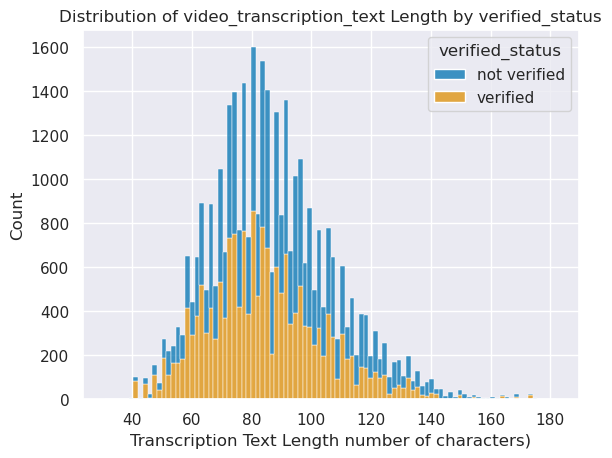

In [22]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and unverified accounts
fig, ax = plt.subplots()
sns.histplot(data=data_upsampled, x='transcription_length', multiple='stack', hue='verified_status')
ax.set_title('Distribution of video_transcription_text Length by verified_status')
ax.set_xlabel('Transcription Text Length number of characters)')

plt.show()

Seems like the length of video transcription text is the same for both groups so we won't use this feature in the model.

### Correlations

Create a correlation matrix to help determine most correlated variables.

In [23]:
# Prepare a new dataframe for the correlation matrix
cols = ['claim_status', 'verified_status', 'author_ban_status', 'video_duration_sec', 'video_view_count', 'video_like_count', 
        'video_share_count', 'video_download_count', 'video_comment_count', 'transcription_length']
data_upsampled_corr = data_upsampled.copy()
data_upsampled_corr = data_upsampled_corr[cols]

# Get numeric representation of the categorical variables
for col in ['claim_status', 'verified_status', 'author_ban_status']:
    data_upsampled_corr[col] = pd.factorize(data_upsampled_corr[col])[0]

# Display first few rows of dataframe after factorization
data_upsampled_corr.head()

,claim_status,verified_status,author_ban_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
0,0,0,0,59,343296.0,19425.0,241.0,1.0,0.0,97
1,0,0,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107
2,0,0,1,31,902185.0,97690.0,2858.0,833.0,329.0,137
3,0,0,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131
4,0,0,1,19,56167.0,34987.0,4110.0,547.0,152.0,128


In [24]:
# Create a correlation matrix
data_upsampled_corr.corr()

,claim_status,verified_status,author_ban_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcription_length
claim_status,1.000000,0.375791,-0.005927,-0.018100,-0.811804,-0.729060,-0.577595,-0.567744,-0.707655,-0.296762
verified_status,0.375791,1.000000,-0.005494,-0.020918,-0.305072,-0.269362,-0.199297,-0.225013,-0.257157,-0.118838
author_ban_status,-0.005927,-0.005494,1.000000,0.011046,0.007144,0.011072,0.000138,0.006461,0.006778,0.023886
video_duration_sec,-0.018100,-0.020918,0.011046,1.000000,0.013892,0.004028,0.001944,0.006930,-0.000080,-0.005043
video_view_count,-0.811804,-0.305072,0.007144,0.013892,1.000000,0.855343,0.710466,0.691557,0.747564,0.246867
video_like_count,-0.729060,-0.269362,0.011072,0.004028,0.855343,1.000000,0.832361,0.806369,0.816416,0.217852
video_share_count,-0.577595,-0.199297,0.000138,0.001944,0.710466,0.832361,1.000000,0.709738,0.671601,0.176362
video_download_count,-0.567744,-0.225013,0.006461,0.006930,0.691557,0.806369,0.709738,1.000000,0.794524,0.175287
video_comment_count,-0.707655,-0.257157,0.006778,-0.000080,0.747564,0.816416,0.671601,0.794524,1.000000,0.217179
transcription_length,-0.296762,-0.118838,0.023886,-0.005043,0.246867,0.217852,0.176362,0.175287,0.217179,1.000000


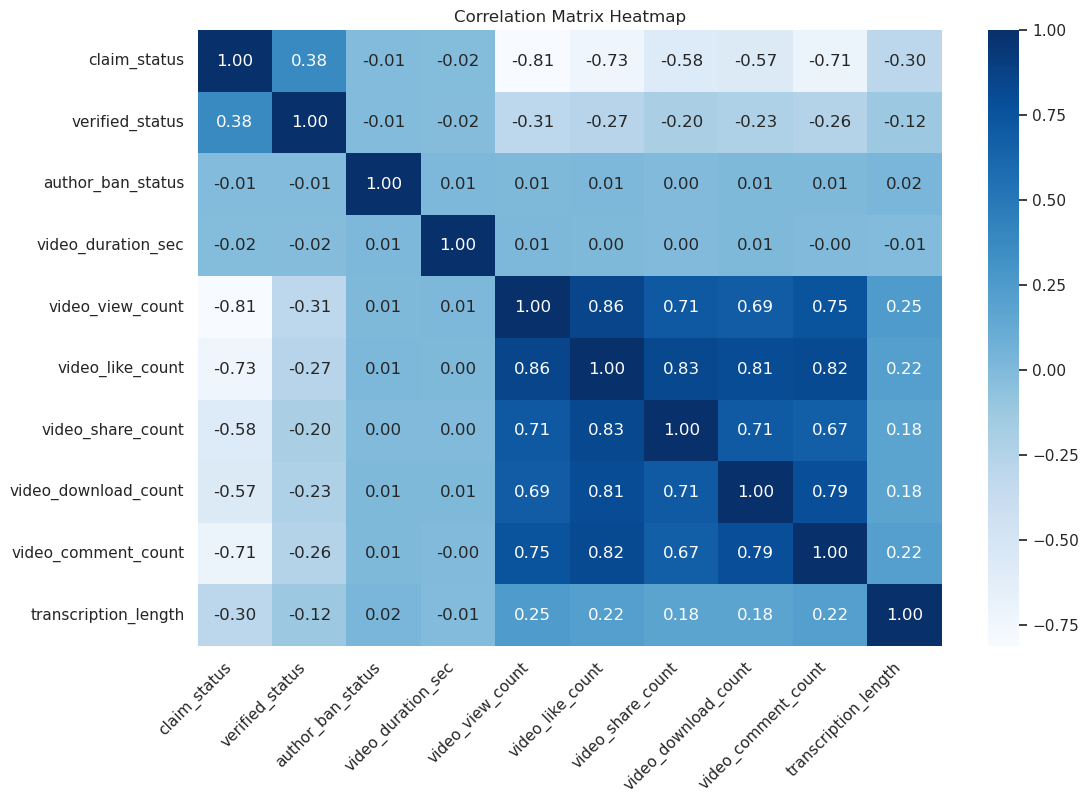

In [25]:
# Create a heatmap to visualize the correlation matrix and see how correlated variables are
fig, ax = plt.subplots(figsize=(12,8))
g = sns.heatmap(data_upsampled_corr.corr(), annot=True, fmt='.2f', cmap='Blues', ax=ax)
ax.set_title('Correlation Matrix Heatmap')
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

`video_view_count` and `video_like_count` is highly correlated with a correlation coefficient of 0.85. All the video stats seems to be correlated as well which makes sense.

Since one of the model assumptions for logistic regression is no severe multicollinearity among the features, we need to exclude `video_like_count` column because it's highly correlated with other video stats columns.

## Part 3: Build Model and Evaluation

### Select the features (X) and the Outcome variable (y)

In [26]:
# Select outcome variable
y = data_upsampled['verified_status']

# Display the outcome variable 
y

0        not verified
1        not verified
2        not verified
3        not verified
4        not verified
             ...     
35763        verified
35764        verified
35765        verified
35766        verified
35767        verified
Name: verified_status, Length: 35768, dtype: object

In [27]:
# Select features
X = data_upsampled[['claim_status', 'author_ban_status', 'video_duration_sec', 'video_view_count', 'video_share_count',
                    'video_download_count', 'video_comment_count']]

# Display first few rows of features dataframe
X.head()

,claim_status,author_ban_status,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,under review,59,343296.0,241.0,1.0,0.0
1,claim,active,32,140877.0,19034.0,1161.0,684.0
2,claim,active,31,902185.0,2858.0,833.0,329.0
3,claim,active,25,437506.0,34812.0,1234.0,584.0
4,claim,active,19,56167.0,4110.0,547.0,152.0


### Train-test Split

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
# Get shape of each training and testing set to confirm the dimensions of training and testing sets are in alignment
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28614, 7), (7154, 7), (28614,), (7154,))

### Encode Features (Train)

In [30]:
# Check data types
X_train.dtypes

claim_status             object
author_ban_status        object
video_duration_sec        int64
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [31]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [32]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['banned', 'active', 'under review'], dtype=object)

We need to encode these two categorical features (`claim_status` and `author_ban_status`) to numeric through one-hot encoding in order to use them in the logistic regression model.

In [33]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
2545,claim,banned
6698,claim,active
34484,claim,active
29873,opinion,active
33093,opinion,under review


In [34]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

# Get feature names from encoder
X_encoder.get_feature_names_out()

/home/jakeli/miniconda3/envs/python/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [35]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [36]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,1.0


In [37]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=['claim_status', 'author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
2545,6,483975.0,5701.0,906.0,466.0
6698,37,462731.0,54928.0,1287.0,611.0
34484,58,575159.0,31984.0,1167.0,82.0
29873,52,5950.0,505.0,35.0,7.0
33093,21,7444.0,279.0,35.0,13.0


In [38]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
X_train_final = pd.concat([X_train_encoded_df, X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)], axis=1)

# Display first few rows
X_train_final.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,0.0,1.0,0.0,6,483975.0,5701.0,906.0,466.0
1,0.0,0.0,0.0,37,462731.0,54928.0,1287.0,611.0
2,0.0,0.0,0.0,58,575159.0,31984.0,1167.0,82.0
3,1.0,0.0,0.0,52,5950.0,505.0,35.0,7.0
4,1.0,0.0,1.0,21,7444.0,279.0,35.0,13.0


### Encode Outcome Variable (Train)

In [39]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [40]:
# Get unique values of outcome variable
y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [41]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [42]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

/home/jakeli/miniconda3/envs/python/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([0., 0., 1., ..., 1., 1., 0.])

### Build Model

In [43]:
# Construct a logistic regression model and fit it to the training set
clf = LogisticRegression(random_state=42).fit(X_train_final, y_train_final)

### Encode Features (Test)

In [44]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [45]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [46]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=['claim_status', 'author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,27,519.0,65.0,1.0,0.0
31748,60,7539.0,181.0,0.0,0.0
20197,59,5129.0,179.0,2.0,0.0
5727,19,792813.0,56597.0,5146.0,728.5
11607,54,2044.0,68.0,19.0,2.0


In [47]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
X_test_final = pd.concat([X_test_encoded_df, X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True)], axis=1)

# Display first few rows
X_test_final.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
0,1.0,0.0,0.0,27,519.0,65.0,1.0,0.0
1,1.0,0.0,0.0,60,7539.0,181.0,0.0,0.0
2,1.0,0.0,0.0,59,5129.0,179.0,2.0,0.0
3,0.0,0.0,0.0,19,792813.0,56597.0,5146.0,728.5
4,1.0,0.0,0.0,54,2044.0,68.0,19.0,2.0


### Make Predictions using Test set

In [48]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = clf.predict(X_test_final)

In [49]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 1., ..., 1., 1., 0.])

In [50]:
# Display the true labels of the testing set
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
16750    not verified
20292        verified
19647        verified
19516        verified
8200     not verified
Name: verified_status, Length: 7154, dtype: object

### Encode Outcome Variable (Test)

In [51]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 1., 1., 0.])

In [52]:
# Get shape of each training and testing set to confirm the dimensions of training and testing sets are in alignment
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((28614, 8), (28614,), (7154, 8), (7154,))

## Part 4: Interpret Model Results

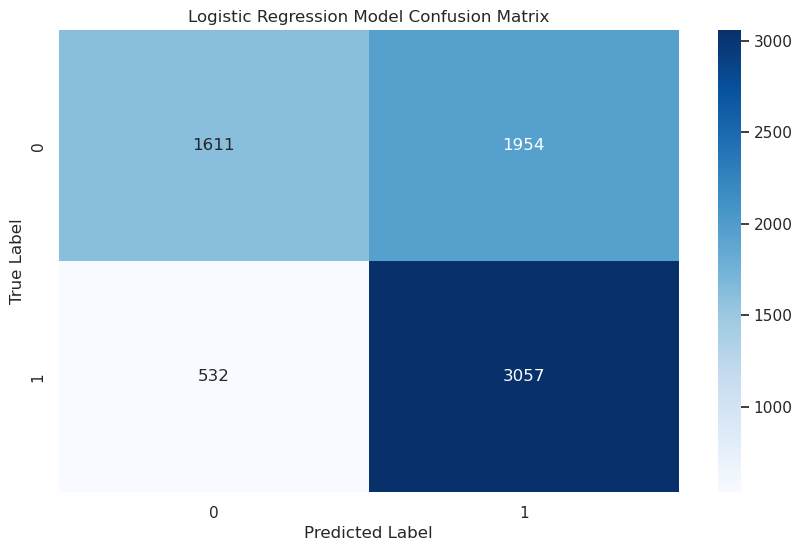

In [54]:
# Create a confusion matrix to visualize the results of the logistic regression model.
cm = confusion_matrix(y_test_final, y_pred, labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Logistic Regression Model Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.show()

In [61]:
# Create a classification report that includes precision, recall, f1-score, and accuracy metrics
# to evaluate the performance of the logistic regression model.
labels = ['verified', 'not verified']
print(classification_report(y_test_final, y_pred, target_names=labels))

              precision    recall  f1-score   support

not verified       0.75      0.45      0.56      3565
    verified       0.61      0.85      0.71      3589

    accuracy                           0.65      7154
   macro avg       0.68      0.65      0.64      7154
weighted avg       0.68      0.65      0.64      7154



### Interpret Model Coefficients

In [55]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
coefficients_df = pd.DataFrame(data={'Feature Name':clf.feature_names_in_, 'Model Coefficient':clf.coef_[0]})

# Format the model coefficients to 6 decimal places
coefficients_df['Model Coefficient'] = coefficients_df["Model Coefficient"].map('{:.6f}'.format)

# Display dataframe
coefficients_df

,Feature Name,Model Coefficient
0,claim_status_opinion,0.000394
1,author_ban_status_banned,-0.000017
2,author_ban_status_under review,-0.000005
3,video_duration_sec,0.008927
4,video_view_count,-0.000002
5,video_share_count,0.000007
6,video_download_count,-0.000053
7,video_comment_count,-0.000531


## Part 5: Conclusion

Key takeaways:
- There are some strongly correlated variables which might lead to multicollinearity issues so we excluded `video_like_count` from the model.
- Developed a logistic regression model for verified status based on video features.
    - Opinion videos is associated with a 0.0004% increase in probability of user having a verified status. This is a very small increase but we can confirm that verified users are more likely to post opinion.
    -  Every second increase in video duration is associated with a 0.009% increase in probability of user having a verified status.
    - For every single view, download, or comment in a video, it seems to lower the probability of user having a verified status. In other words, videos with high views, downloads, and/or comments are likely to be posted by unverified users.
- The model yields a decent result.
    -  Accuracy: 0.65 (the percent of predications we got correct)
    -  Precision: 0.61 (out of all the times the model predicted 'verified', what was the percentage it was correct)
    -  Recall: 0.85 (out of all the times the true label is 'verified', how many did the model get it correct)